## Visualización estática

* Inicialmente se descargan los datos que son objetivo de estudio a través de un archivo .csv y procedemos a subir el archivo.

In [5]:
import pandas as pd
archivo_csv = ".\\assest\\athlete_events.csv"  

# Cargamos los datos en un DataFrame con Pandas
df = pd.read_csv(archivo_csv)

print(df.head())


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

* Filtramos ahora nuestros datos para incluir únicamente las filas correspondientes a los ganadores de medallas de 2016 en los cinco deportes de estudio: atletismo, natación, remo, fútbol y hockey

In [3]:


# Filtrar por año (2016) y deportes específicos
filtro = (df['Year'] == 2016) & (df['Sport'].isin(['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']))

# Aplicar el filtro al DataFrame
resultados_2016 = df[filtro]

# Mostrar los resultados filtrados
print(resultados_2016)


            ID                                   Name Sex   Age  Height  \
148         55                    Antonio Abadia Beci   M  26.0   170.0   
158         62                      Giovanni Abagnale   M  21.0   198.0   
232        110                   Abubakar Abbas Abbas   M  20.0   175.0   
432        239                       Ayoub Abdellaoui   M  23.0   184.0   
451        251                            Bashir Abdi   M  27.0   176.0   
...        ...                                    ...  ..   ...     ...   
270943  135489  Anastasiya Valeryevna Zuyeva-Fesikova   F  26.0   182.0   
271019  135525                         Martin Zwicker   M  29.0   175.0   
271053  135547          Viktoriya Viktorovna Zyabkina   F  23.0   174.0   
271054  135547          Viktoriya Viktorovna Zyabkina   F  23.0   174.0   
271055  135547          Viktoriya Viktorovna Zyabkina   F  23.0   174.0   

        Weight        Team  NOC        Games  Year  Season            City  \
148       65.0       

* Revisamos el tipo de datos que tenemos 

In [4]:
print(resultados_2016.dtypes)


ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


* ID: Es de tipo int64, lo que indica que es un identificador único representado como un número entero.

* Name, Sex, Team, NOC, Games, Season, City, Sport, Event, Medal: Contienen datos de tipo object, lo que significa que contienen valores de texto o cadenas de caracteres.

* Age, Height, Weight: Son de tipo float64, lo que indica valores numéricos decimales.

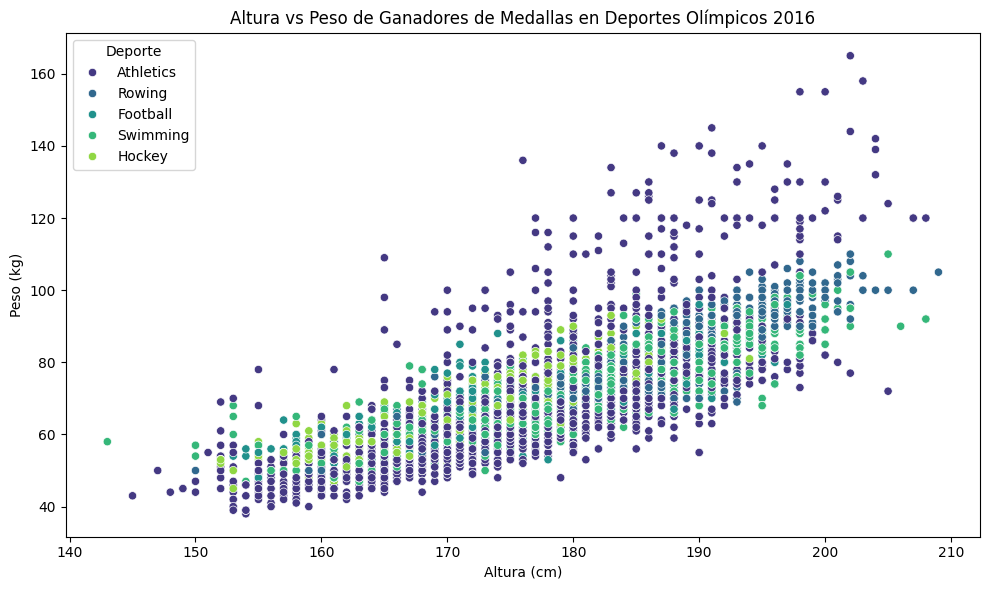

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión para ver el comportamiento de los datos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', hue='Sport', data=resultados_2016, palette='viridis')

# Colocamos los nombres de lo titulos que se van a visualizar en el gráfico
plt.title('Altura vs Peso de Ganadores de Medallas en Deportes Olímpicos 2016')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.legend(title='Deporte')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


* Podemos ver que de forma general el comportamiento es parecido en cada uno de los deportes. Así, de forma global podemos decir que los participantes en su mayoría tienen un altura de 150 cm a 200 cm y tienen un peso entre 40 kg y 100 kg. 

* De forma puntual, podemos ver que el deporte con mayor variabilidad en terminos de altura y peso es Athletics. A diferencia de "Hockey" cuyo comportamiento parece ser más estable. Los participantes de Hockey tienen una altura entre 150cm y 195 cm aprroximandamente y los pesos van desde 43kg hasta 90 kg aproximadamente. Por otro lado, podemos ver que conforme se aumenta en altura se aumenta un poco la distribución  cuanto al peso.

* Ahora, para visualizar según tipo de medalla, procedemos a filtrar nuestros datos respecto a esta variable

In [6]:
# Filtrar por medalla específica
medalla_oro = df[df['Medal'] == 'Gold']
medalla_plata = df[df['Medal'] == 'Silver']
medalla_bronce = df[df['Medal'] == 'Bronze']


C:\Users\varga\AppData\Local\Temp\ipykernel_23480\3236128670.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medal', y='Height', data=df, order=['Gold', 'Silver', 'Bronze'], palette=colores, ax=axes[0])
C:\Users\varga\AppData\Local\Temp\ipykernel_23480\3236128670.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medal', y='Weight', data=df, order=['Gold', 'Silver', 'Bronze'], palette=colores, ax=axes[1])


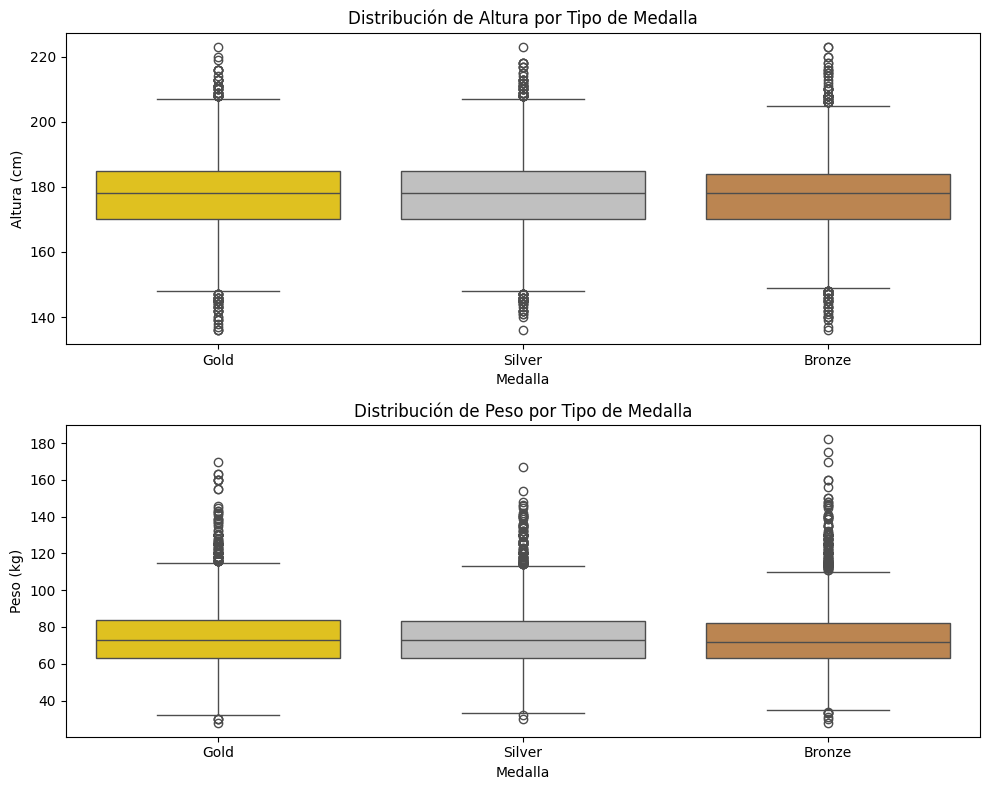

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subplots para altura y peso
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Definir una paleta de colores personalizada
colores = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'peru'}

# Gráfico de cajas para altura con paleta de colores
sns.boxplot(x='Medal', y='Height', data=df, order=['Gold', 'Silver', 'Bronze'], palette=colores, ax=axes[0])
axes[0].set_title('Distribución de Altura por Tipo de Medalla')
axes[0].set_xlabel('Medalla')
axes[0].set_ylabel('Altura (cm)')

# Gráfico de cajas para peso con paleta de colores
sns.boxplot(x='Medal', y='Weight', data=df, order=['Gold', 'Silver', 'Bronze'], palette=colores, ax=axes[1])
axes[1].set_title('Distribución de Peso por Tipo de Medalla')
axes[1].set_xlabel('Medalla')
axes[1].set_ylabel('Peso (kg)')

# Ajustes de diseño
plt.tight_layout()
plt.show()


**Altura por Tipo de Medalla:**

Si observamos la mediana. Podemos notar que no hay diferencias visibles en la altura mediana entre los ganadores de medallas de oro, plata y bronce. Por lo que pordiamos decir que la altura no define ganar una medalla de oro. Asimismo, podemos ver que de forma global la altura para los ganadores de medallas de bronce es un poco más baja que para los de oro y plata, lo que podría indicar  de forma global los atletas que ganaron bronze son un poco más bajos en comparación con aquellos que ganaron oro o plata. 
Con respecto a la dispersión de los datos. Los bigotes de la caja y los puntos fuera de ellos nos dan una idea de la variabilidad de la altura en cada tipo de medalla. 

**Peso por Tipo de Medalla:**

Similar a la altura, la comparación entre las medianas del peso para los ganadores de diferentes medallas puede proporcionar información sobre posibles diferencias en el peso de los atletas que ganaron medallas de oro, plata y bronce.
Podemos notar que los ganadores de medallas de Bronze tiene una mediana inferior a los ganadores de oro y plata, por lo que podria supones que a menor peso menor es la probabilidad de tener un medalla de oro o plata.
Por otro lado, si vemos el caso puntual de bronze parece que hay muchos valores atípicos en este tipo de medalla, podríamos suponer que existe una mayor variabilidad en el peso de los atletas que ganaron esta medalla en particular.
